# Before we start the t-test we should do some exploratory data analysis to create some hypothesis. 

In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Let us load in our min/max adjusted data

In [4]:
data = pd.read_csv('min_max_final_data.csv') 

In [5]:
data.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg)
0,1997-01-31 00:00:00,0.012635,0.584587,0.517158,0.680751,0.642884,0.568535,0.549643,0.527047,0.494069,0.467788,0.524759,0.478103,0.533126
1,1997-02-28 00:00:00,0.009025,0.593261,0.509066,0.688741,0.659008,0.561717,0.563899,0.528718,0.539697,0.457031,0.518750,0.478338,0.530388
2,1997-03-31 00:00:00,0.005415,0.477740,0.317745,0.680690,0.645003,0.552704,0.562119,0.521630,0.515042,0.451279,0.525495,0.481818,0.540103
3,1997-04-30 00:00:00,0.009025,0.697805,0.685033,0.668160,0.669786,0.557817,0.586533,0.519301,0.534209,0.444035,0.522416,0.486217,0.535774
4,1997-05-31 00:00:00,0.012635,0.643998,0.607264,0.672094,0.655649,0.566798,0.630889,0.506594,0.528205,0.450918,0.520697,0.489676,0.547189


In [6]:
data.tail()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg)
274,2019-11-30 00:00:00,0.102888,0.590344,0.466769,0.712228,0.683801,0.588496,0.620048,NaN,NaN,NaN,NaN,NaN,NaN
275,2019-12-31 00:00:00,0.084838,0.597866,0.464175,0.738801,0.694815,0.506555,0.581027,NaN,NaN,NaN,NaN,NaN,NaN
276,2020-01-31 00:00:00,0.099278,0.756064,0.745319,0.636017,0.701146,0.106522,0.212853,NaN,NaN,NaN,NaN,NaN,NaN
277,2020-02-29 00:00:00,0.137184,0.672705,0.727766,0.560896,0.610161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,2020-03-31 00:00:00,0.453069,0.000000,0.401238,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Lets see if our variables are correlated
### With correlation matrix 
# -------------------------------------------------------------------------------

# We can explore a lot with this above, but lets focus on OAS

### We see that the further we go out the more correlated the excess return is with OAS.
#### *It would be interesting to see how the correlation would change for 24M and 36M

# You can also see interesting patterns with the 3M to the 6M,9M,12M

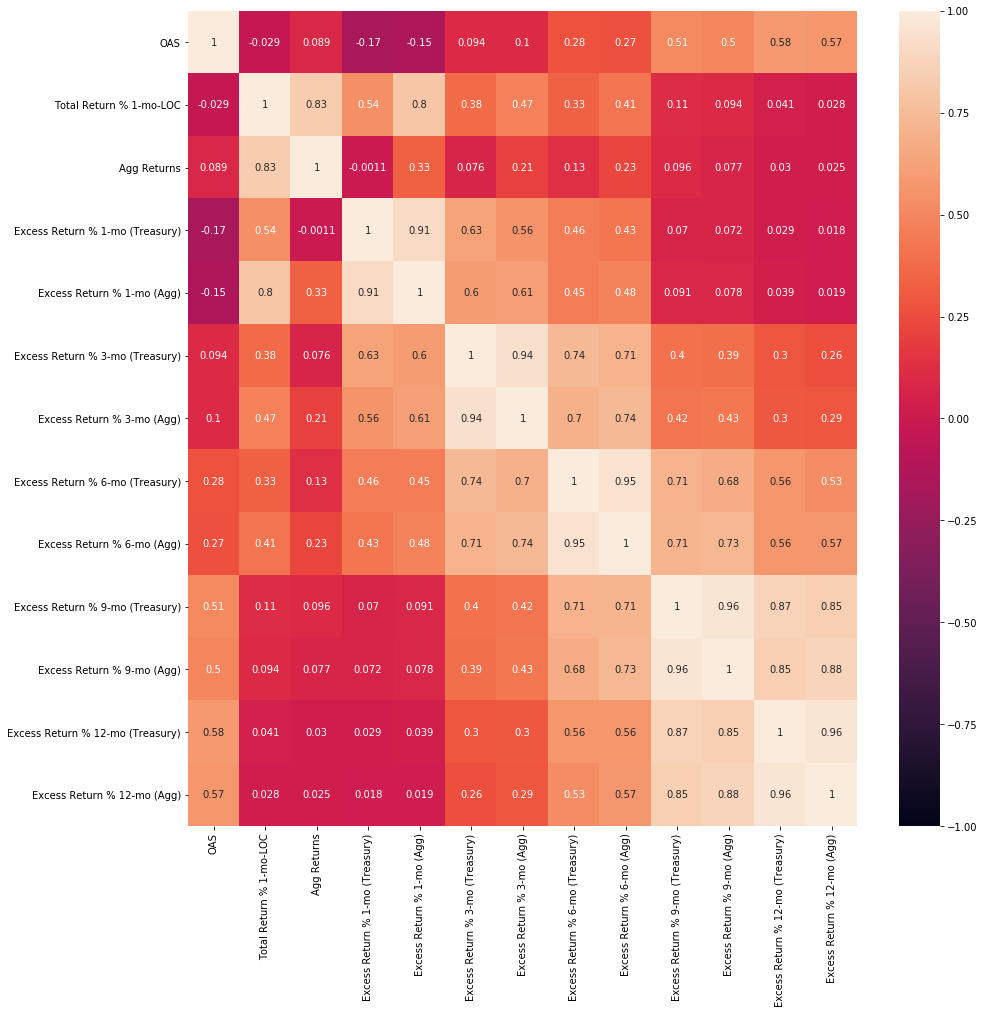

In [10]:
#Pairwise correlation between attributes
fig=plt.figure(figsize=(15, 15))
sns.heatmap(data[['OAS', 'Total Return % 1-mo-LOC', 'Agg Returns', 'Excess Return % 1-mo (Treasury)', 'Excess Return % 1-mo (Agg)', 'Excess Return % 3-mo (Treasury)', 'Excess Return % 3-mo (Agg)', 'Excess Return % 6-mo (Treasury)', 'Excess Return % 6-mo (Agg)','Excess Return % 9-mo (Treasury)', 'Excess Return % 9-mo (Agg)', 'Excess Return % 12-mo (Treasury)', 'Excess Return % 12-mo (Agg)']].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

# Now that we see the picture, let us make some linear regression models.

## Relationship Between OAS & Excess Return % 1-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 1-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

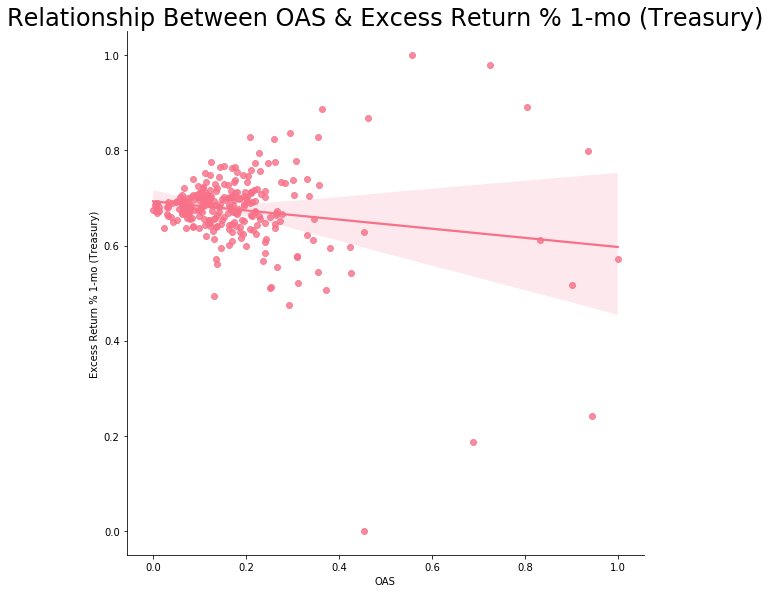

In [11]:
# For OAS Excess Return % 1-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Treasury)', size=24)

## Relationship Between OAS & Excess Return % 1-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 1-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

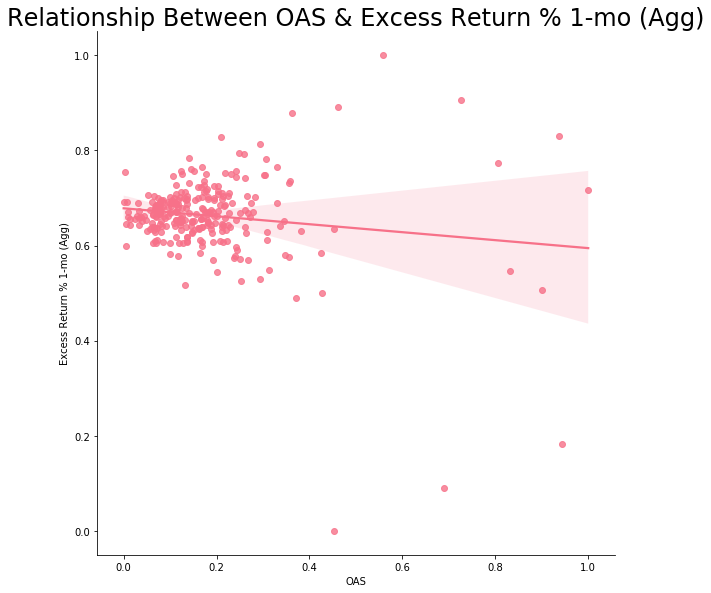

In [12]:
# For OAS Excess Return % 1-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Agg)', size=24)

## Relationship Between OAS & Excess Return % 3-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 3-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

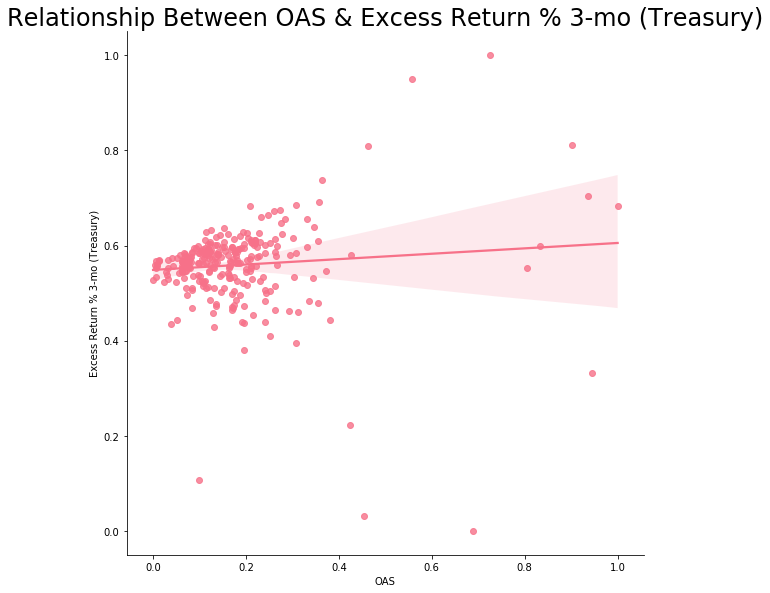

In [13]:
# For OAS Excess Return % 3-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Treasury)', size=24)

## Relationship Between OAS & Excess Return % 3-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 3-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

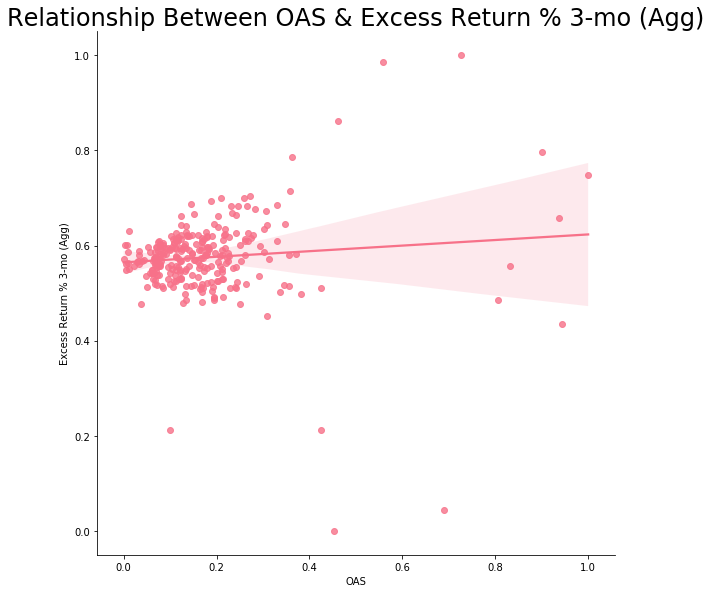

In [14]:
# For OAS Excess Return % 3-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Agg)', size=24)

## Relationship Between OAS & Excess Return % 6-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 6-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

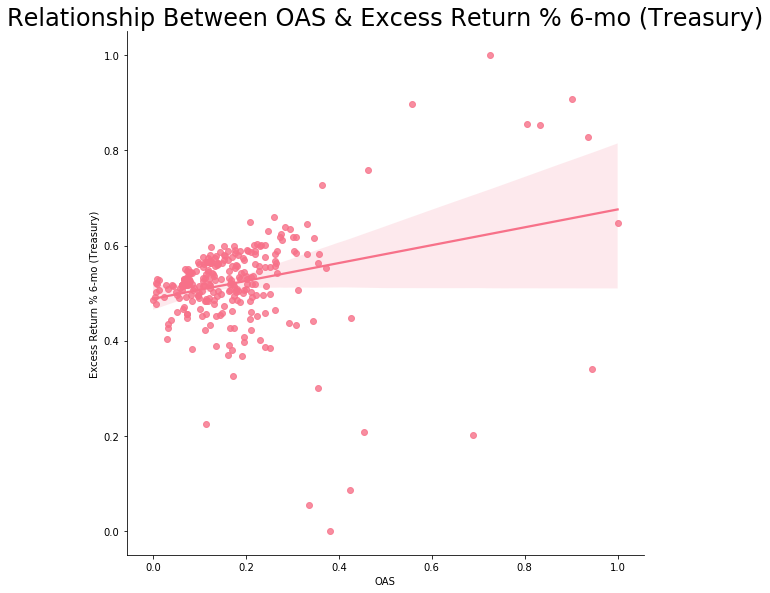

In [15]:
# For OAS Excess Return % 6-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Treasury)', size=24)

## Relationship Between OAS & Excess Return % 6-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 6-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

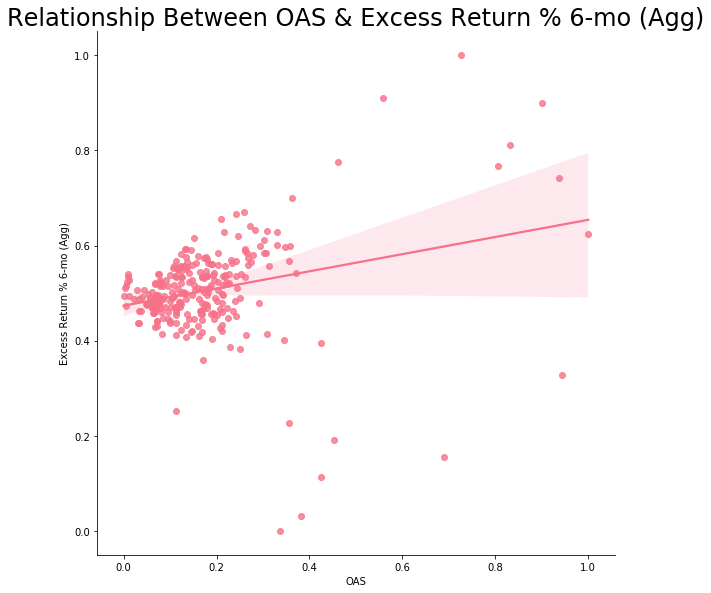

In [16]:
# For OAS Excess Return % 6-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Agg)', size=24)

## Relationship Between OAS & Excess Return % 9-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 9-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

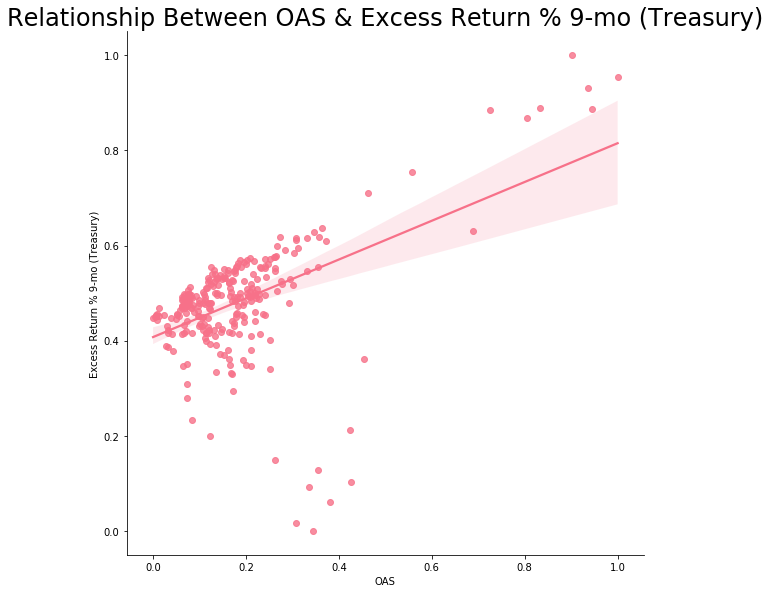

In [17]:
# For OAS Excess Return % 9-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Treasury)', size=24)

## Relationship Between OAS & Excess Return % 9-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 9-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

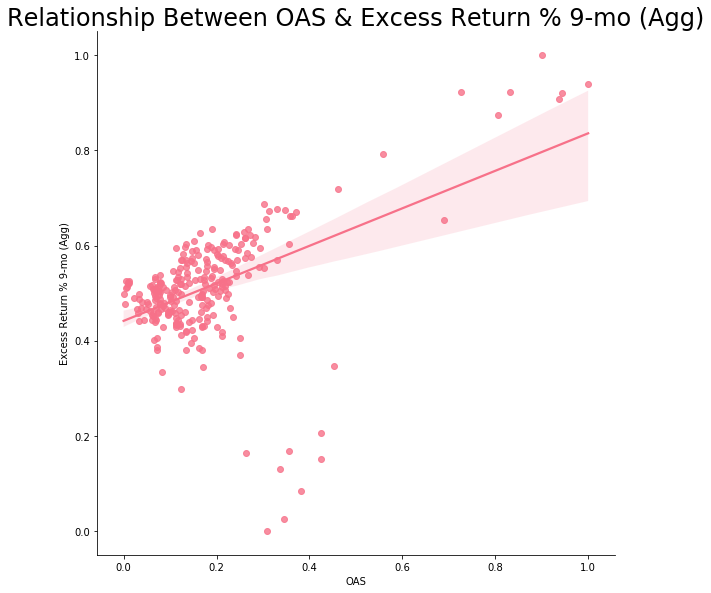

In [18]:
# For OAS Excess Return % 9-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Agg)', size=24)

## Relationship Between OAS & Excess Return % 12-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 12-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

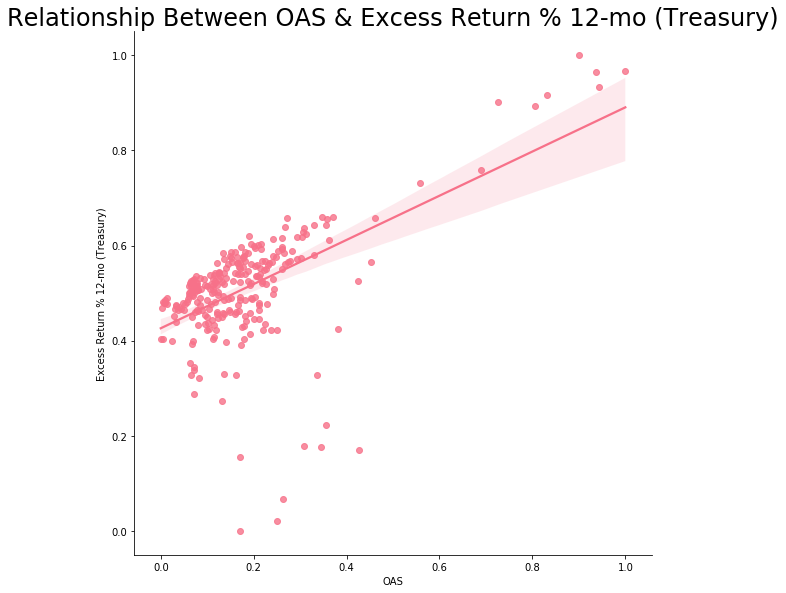

In [19]:
# For OAS Excess Return % 12-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Treasury)', size=24)


## Relationship Between OAS & Excess Return % 12-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 12-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

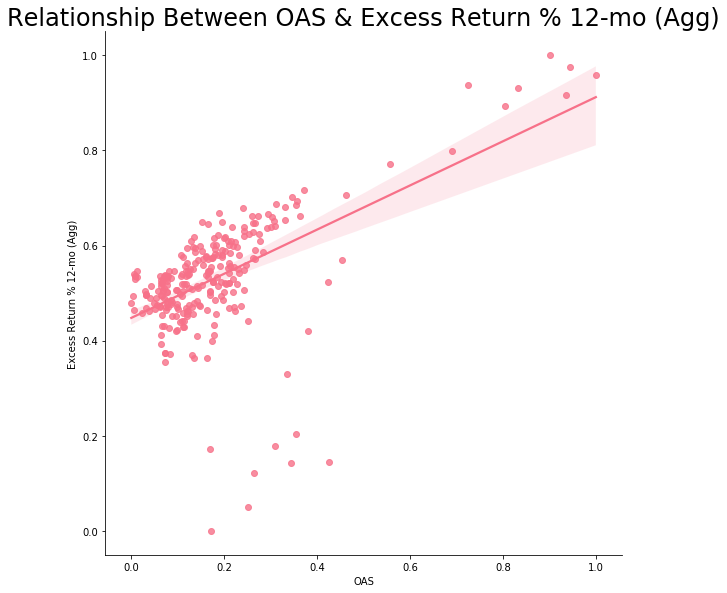

In [20]:
# For OAS Excess Return % 12-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Agg)', size=24)